<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/multipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ipdb

       Real Values  Predicted Values
7529         0.889          1.577899
6288         3.304          3.579252
19011        1.585          1.921991
470          1.569          1.298765
13304        1.262          1.665471
...            ...               ...
16222        1.899          2.888133
3537         2.542          2.069999
16793        2.609          2.690681
13518        1.115          1.527783
11600        3.720          2.762272

[4128 rows x 2 columns]
Mean Squared Error (MSE): 0.6816669390076939
Root Mean Squared Error (RMSE): 0.8256312366957139
Mean Absolute Error (MAE): 0.6166274747767112
R-squared (R2): 0.4951244340742821


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


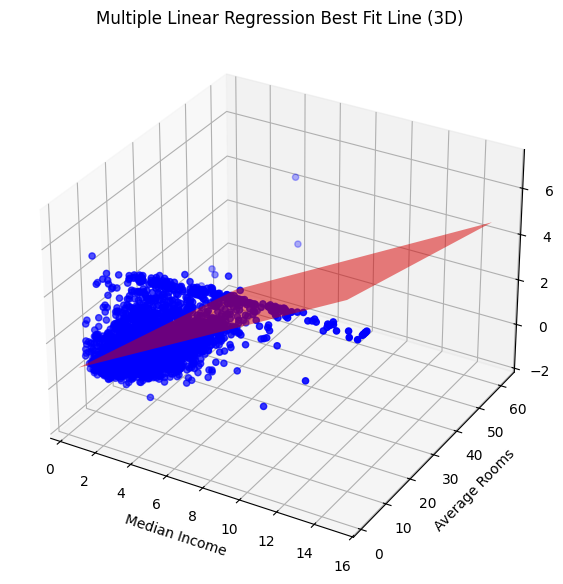

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# load dataset
california_housing = fetch_california_housing()
# print(california_housing.data)

X = pd.DataFrame(california_housing.data, columns = california_housing.feature_names)
# print(X)
y = pd.Series(california_housing.target)

X = X[['MedInc', 'AveRooms']]

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
print(df)

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
# Assuming you have your true y values (y_test) and predicted y values (y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['MedInc'], X_test['AveRooms'],
           y_test, color='blue', label='Actual Data')

x1_range = np.linspace(X_test['MedInc'].min(), X_test['MedInc'].max(), 100)
x2_range = np.linspace(X_test['AveRooms'].min(), X_test['AveRooms'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

z = regressor.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)
# ipdb.set_trace()
ax.plot_surface(x1, x2, z, color='red', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Median Income')
ax.set_ylabel('Average Rooms')
ax.set_zlabel('House Price')
ax.set_title('Multiple Linear Regression Best Fit Line (3D)')

plt.show()